In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

from sklearn.model_selection import train_test_split

In [2]:
Data = np.array([[[i+j] for i in range(5)] for j in range(100)])/100
target = np.array([i+5 for i in range(100)])/100
Data[0], target[0], Data.shape, target.shape

(array([[0.  ],
        [0.01],
        [0.02],
        [0.03],
        [0.04]]),
 0.05,
 (100, 5, 1),
 (100,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(Data, target, test_size=0.2, random_state=5)
# X_train = tf.convert_to_tensor(X_train)
# X_test = tf.convert_to_tensor(X_test)
# y_train = tf.convert_to_tensor(y_train)
# y_test = tf.convert_to_tensor(y_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 5, 1), (20, 5, 1), (80,), (20,))

In [4]:
model = Sequential()
model.add(LSTM((1), return_sequences=False, batch_input_shape=(None, 5,1)))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 27s 9ms/step - loss: 0.3487 - accuracy: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.3590 - accuracy: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3616 - accuracy: 0.0000e+00
Epoch 4/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3465 - accuracy: 0.0000e+00
Epoch 5/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.3453 - accuracy: 0.0000e+00
Epoch 6/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3450 - accuracy: 0.0000e+00
Epoch 7/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.3473 - accuracy: 0.0000e+00
Epoch 8/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.3374 - accuracy: 0.0000e+00
Epoch 9/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3328 - accuracy: 0.0000e+00
Epoch 10/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.3354 

In [6]:
result = model.predict(X_test)

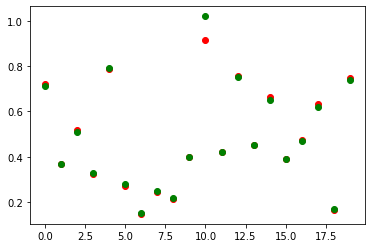

In [7]:
plt.scatter(range(20), result, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

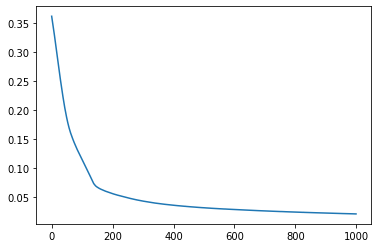

In [8]:
plt.plot(history.history['loss']);